<a href="https://colab.research.google.com/github/syilmazs/MachineLearning/blob/main/Heart_Stroke_Prediction_lab_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [145]:
df = pd.read_csv("heart.csv")

# EDA

In [146]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
273,58,1,0,100,234,0,1,156,0,0.100,2,1,3,0
233,64,1,0,120,246,0,0,96,1,2.200,0,1,2,0
215,43,0,0,132,341,1,0,136,1,3.000,1,0,3,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [148]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [149]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [150]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [151]:
df.shape

(303, 14)

In [152]:
df.cp.value_counts() # chest pain (cp) is a categrical numeric data.

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [153]:
df.restecg.value_counts() # restecg  is a categrical numeric data.

1    152
0    147
2      4
Name: restecg, dtype: int64

In [154]:
df.thal.value_counts() # thal is a categrical numeric data.

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [155]:
df[df.thal == 0] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0,0


In [156]:
df.drop(df.index[[48, 281]], inplace= True) # dropping two rows with irrelevant thal values.

In [157]:
df.slope.value_counts() # slope is a categrical numeric data.

2    141
1    139
0     21
Name: slope, dtype: int64

In [158]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})
df['slope']=df['slope'].replace({0:'upsloping',1:'flat', 2:'downsloping'})
df['thal']=df['thal'].replace({1:'normal', 2:'fixed defect', 3:'reversable defect'})

In [159]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
189,41,1,typical angina,110,172,0,normal,158,0,0.000,downsloping,0,reversable defect,0
185,44,1,typical angina,112,290,0,normal,153,0,0.000,downsloping,1,fixed defect,0
2,41,0,atypical angina,130,204,0,normal,172,0,1.400,downsloping,0,fixed defect,1
186,60,1,typical angina,130,253,0,having ST-T wave abnormality,144,1,1.400,downsloping,1,reversable defect,0
216,62,0,non-anginal pain,130,263,0,having ST-T wave abnormality,97,0,1.200,flat,1,reversable defect,0


In [160]:
def color_red(cor):
    
    if cor > 0.50 and cor < 1.0:
        color = 'red'
    elif cor < -0.50 and cor > -1.0:
        color = 'red'
    elif cor == 1.0:
        color = 'orange'
    else:
        color = 'black'
    return f'color: {color}'
df.corr().style.applymap(color_red)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
age,1.000000,-0.099038,0.279150,0.213067,0.124411,-0.400677,0.098122,0.209845,0.275859,-0.226722
sex,-0.099038,1.000000,-0.057568,-0.200125,0.038182,-0.052430,0.136230,0.092338,0.117098,-0.276170
trestbps,0.279150,-0.057568,1.000000,0.122433,0.180689,-0.047743,0.068422,0.192861,0.100592,-0.145564
chol,0.213067,-0.200125,0.122433,1.000000,0.019193,-0.012203,0.069971,0.052272,0.067411,-0.086861
fbs,0.124411,0.038182,0.180689,0.019193,1.000000,-0.013002,0.013534,0.004855,0.144331,-0.018382
thalach,-0.400677,-0.052430,-0.047743,-0.012203,-0.013002,1.000000,-0.386745,-0.350497,-0.217336,0.430447
exang,0.098122,0.136230,0.068422,0.069971,0.013534,-0.386745,1.000000,0.287926,0.118191,-0.432743
oldpeak,0.209845,0.092338,0.192861,0.052272,0.004855,-0.350497,0.287926,1.000000,0.221143,-0.430131
ca,0.275859,0.117098,0.100592,0.067411,0.144331,-0.217336,0.118191,0.221143,1.000000,-0.394139
target,-0.226722,-0.276170,-0.145564,-0.086861,-0.018382,0.430447,-0.432743,-0.430131,-0.394139,1.000000


In [161]:
df.target.value_counts() # Looks like a balanced data.

1    164
0    137
Name: target, dtype: int64

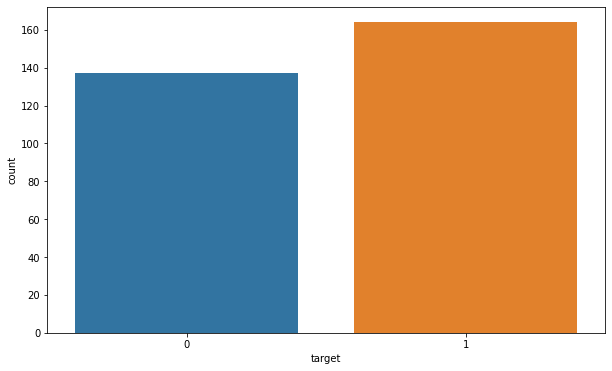

In [162]:
sns.countplot(df.target)

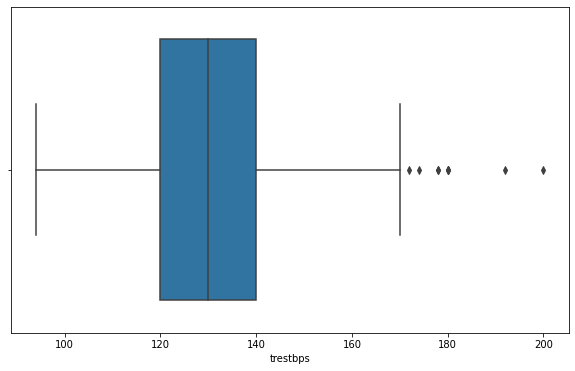

In [163]:
sns.boxplot(df.trestbps) # There are some outliers in trestbps and chol features. However these values does not evaluated as outliers and kept in the data.

ValueError: ignored

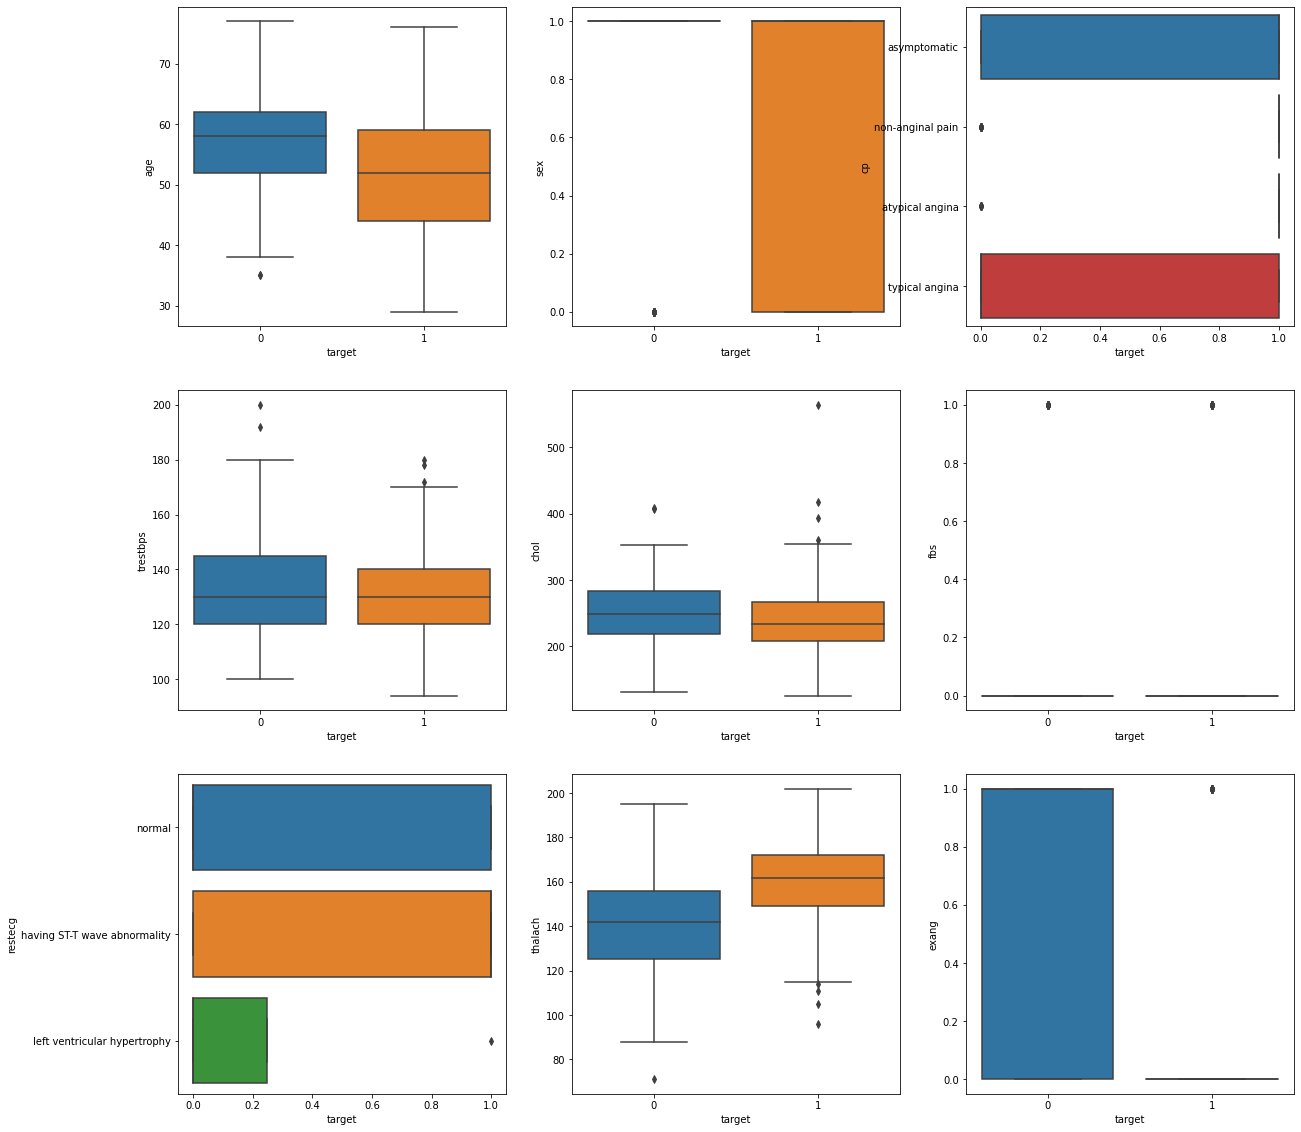

In [164]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='target',y=feature,data=df)

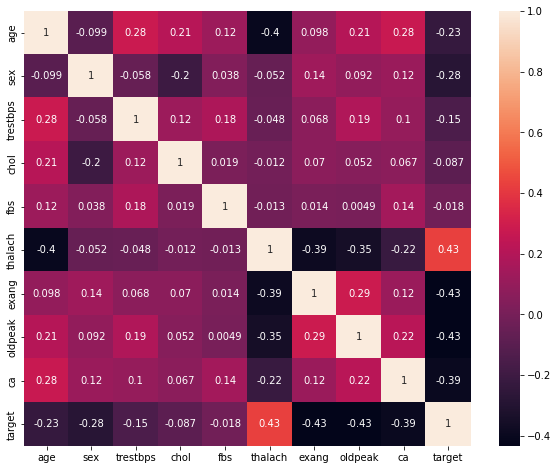

In [165]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

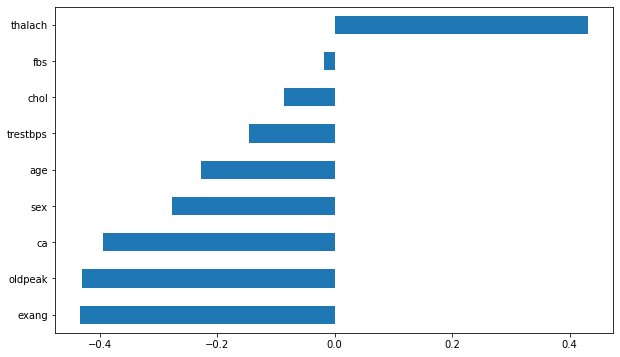

In [166]:
df.corr()["target"].drop("target").sort_values().plot.barh() # There some interesting issues like diabetes, cholostereol and age are negatively correlated with the healh disease risk. That is incompatible to the general health knowledge.   

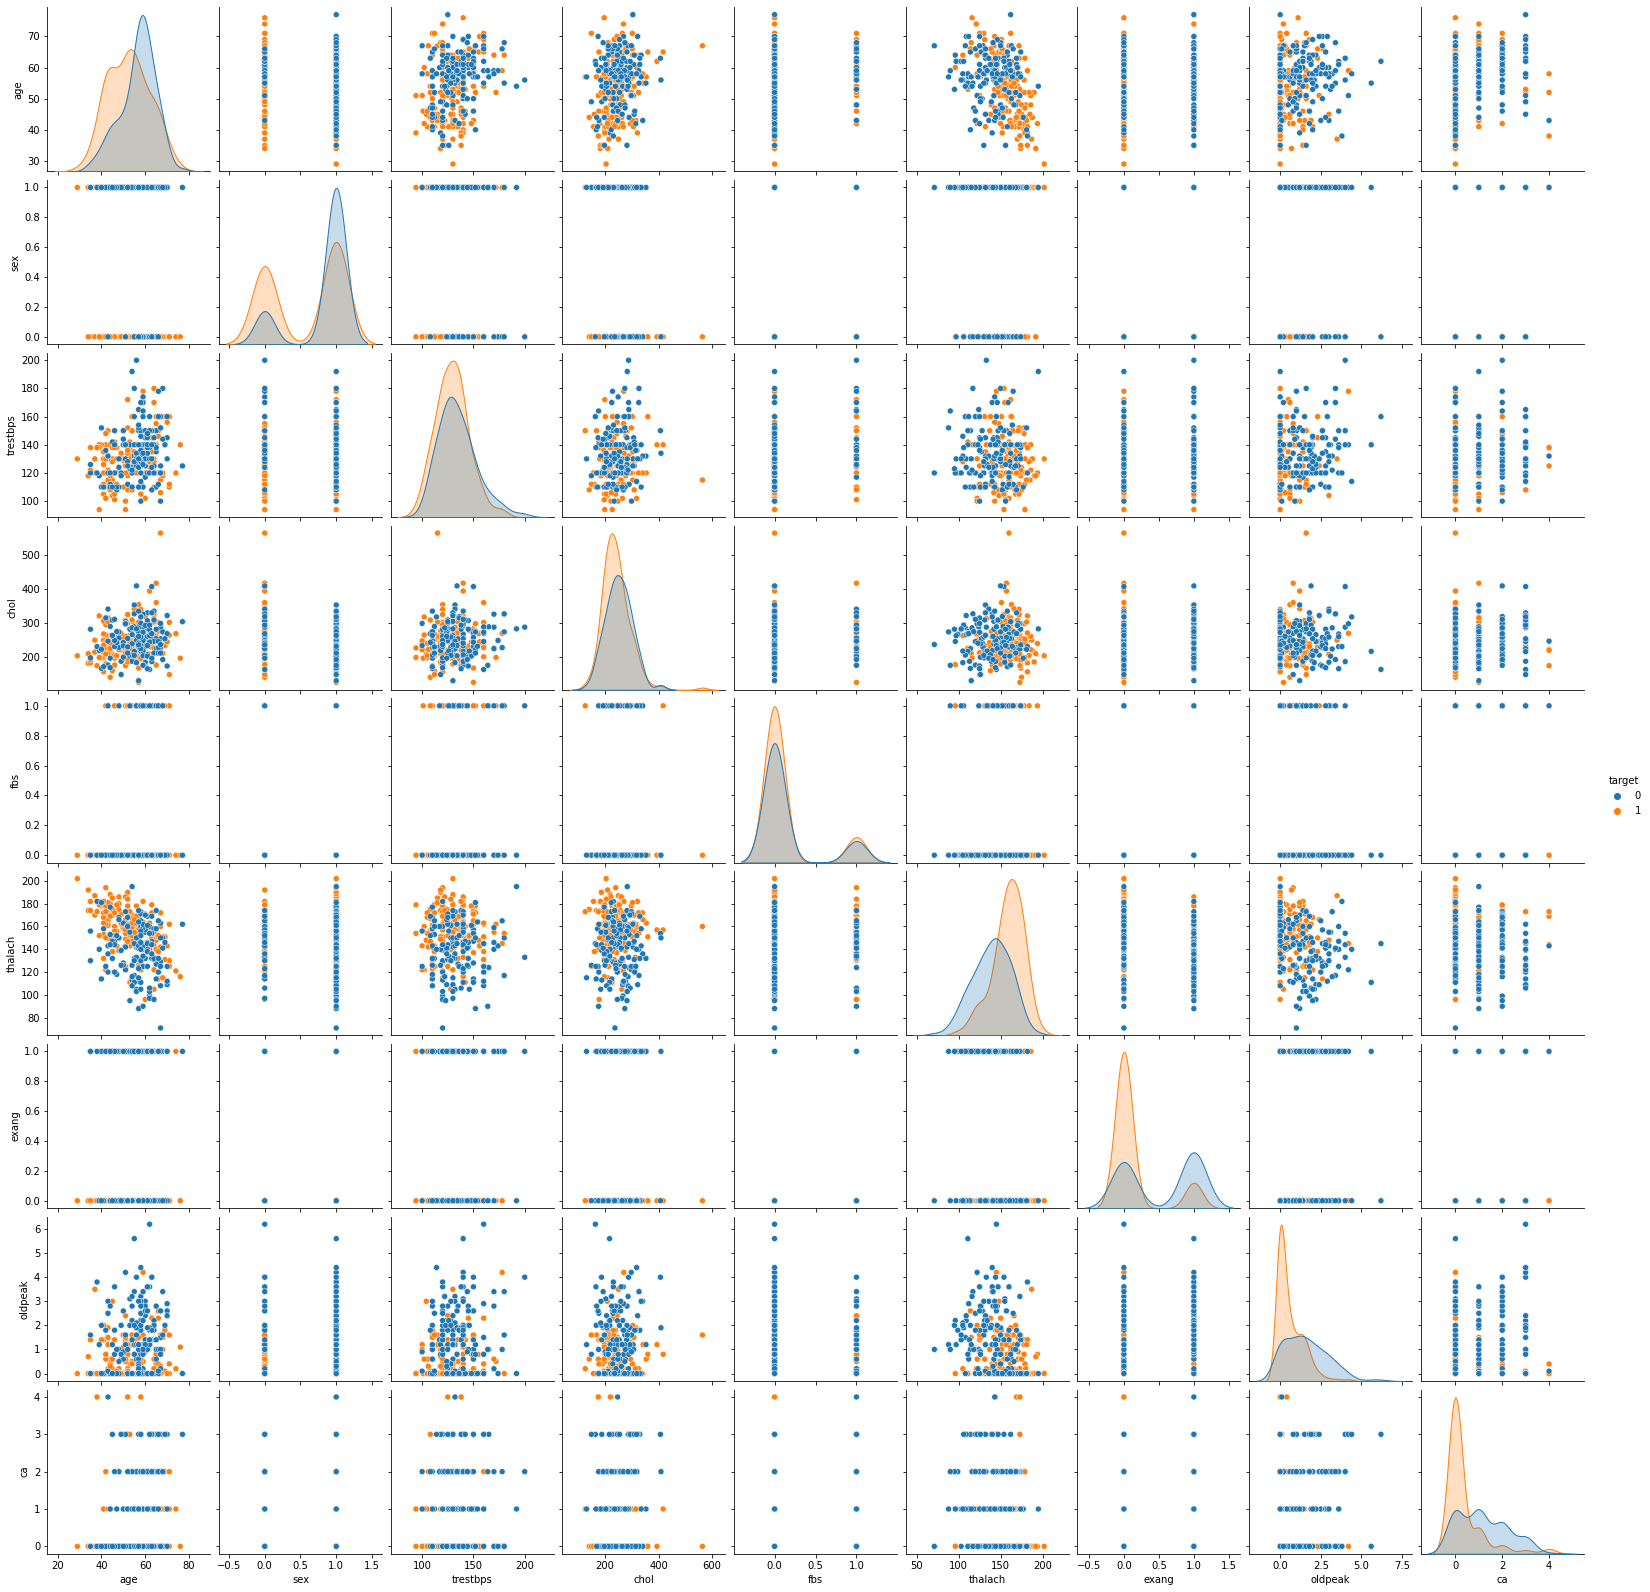

In [59]:
sns.pairplot(df, hue = "target") 

In [167]:
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.300,0,1,0,0,0,0,1,0,1,1,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,0,0,0,0,0,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.200,0,0,0,0,1,0,0,1,0,0,1
299,45,1,110,264,0,132,0,1.200,0,0,0,0,0,0,0,1,0,0,1
300,68,1,144,193,1,141,0,3.400,2,0,0,0,1,0,0,1,0,0,1
301,57,1,130,131,0,115,1,1.200,1,0,0,0,1,0,0,1,0,0,1


In [168]:
df.shape

(301, 19)

# Data Preprocessing

In [169]:
X = df.drop('target',axis=1)
y = df['target']

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
scaler = MinMaxScaler()

In [173]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
log_model = LogisticRegression()

In [176]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [177]:
log_model.coef_

array([[-0.47213179, -1.02409809, -0.42041696, -0.32861304,  0.06014032,
         0.53055329, -0.9737968 , -1.38707847, -1.54344943, -0.07278609,
         0.63670387, -1.11909645, -0.22094223, -0.43265957, -1.05103705,
        -0.26266728, -0.31451562, -1.38958148]])

In [178]:
log_model.intercept_

array([3.51349557])

In [179]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [180]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.9575771 , 0.0424229 ],
       [0.85802199, 0.14197801],
       [0.74125944, 0.25874056],
       [0.60815647, 0.39184353],
       [0.28240643, 0.71759357],
       [0.06560361, 0.93439639],
       [0.54104456, 0.45895544],
       [0.27471461, 0.72528539],
       [0.96030758, 0.03969242],
       [0.14406116, 0.85593884],
       [0.56961021, 0.43038979],
       [0.70252762, 0.29747238],
       [0.09093537, 0.90906463],
       [0.98281025, 0.01718975],
       [0.96404248, 0.03595752],
       [0.06162222, 0.93837778],
       [0.02747108, 0.97252892],
       [0.09436793, 0.90563207],
       [0.38052019, 0.61947981],
       [0.07325392, 0.92674608],
       [0.92113592, 0.07886408],
       [0.94632173, 0.05367827],
       [0.5108715 , 0.4891285 ],
       [0.1051641 , 0.8948359 ],
       [0.17695879, 0.82304121],
       [0.83168393, 0.16831607],
       [0.65983363, 0.34016637],
       [0.04224568, 0.95775432],
       [0.28453075, 0.71546925],
       [0.12432544, 0.87567456],
       [0.

In [181]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,target,pred,pred_proba
168,63,1,130,254,0,147,0,1.400,1,0,0,1,0,1,1,0,0,1,0,0,0.078
45,52,1,120,325,0,172,0,0.200,0,1,0,0,0,0,0,0,0,0,1,1,0.909
145,70,1,156,245,0,143,0,0.000,0,1,0,0,0,1,0,0,0,0,1,1,0.823
42,45,1,104,208,0,148,1,3.000,0,0,0,1,0,1,1,0,0,0,1,0,0.154
17,66,0,150,226,0,114,0,2.600,0,0,0,0,0,0,0,1,0,0,1,1,0.899
224,54,1,110,239,0,126,1,2.800,1,0,0,1,0,0,1,0,0,1,0,0,0.038
110,64,0,180,325,0,154,1,0.000,0,0,0,1,0,0,0,0,0,0,1,1,0.715
102,63,0,140,195,0,179,0,0.000,2,1,0,0,0,0,0,0,0,0,1,1,0.927
267,49,1,118,149,0,126,0,0.800,3,0,1,0,0,1,0,0,0,0,0,1,0.781
287,57,1,154,232,0,164,0,0.000,1,1,0,0,0,1,0,0,0,0,0,1,0.799


In [182]:
from sklearn.metrics import confusion_matrix, classification_report

In [183]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [184]:
logmodel_metrics = eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test) # Imbalance sorunu olmadığı için accuracy skoru yeterli olabilir. Diğer yandan recall ve precion skorları da makul. Sadece recall skorunda test ve train datası arasında bir miktar fark var. 
logmodel_metrics

Test_Set
[[23  4]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.86      0.74      0.79        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61


Train_Set
[[ 91  19]
 [ 15 115]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       110
           1       0.86      0.88      0.87       130

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



In [185]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

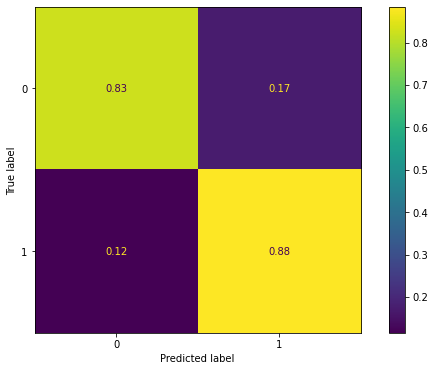

In [186]:
plot_confusion_matrix(log_model, X_train_scaled, y_train, normalize="true");

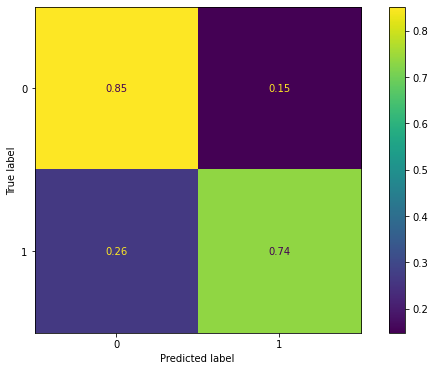

In [187]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

In [190]:
# Cross Validation

In [191]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

In [192]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.012,0.004,0.765,1.000,0.867,0.833
2,0.006,0.004,0.846,0.846,0.846,0.833
3,0.007,0.003,1.000,0.846,0.917,0.917
4,0.006,0.004,0.857,0.923,0.889,0.875
5,0.007,0.004,0.800,0.923,0.857,0.833
6,0.006,0.003,0.786,0.846,0.815,0.792
7,0.006,0.003,0.923,0.923,0.923,0.917
8,0.006,0.004,0.917,0.846,0.880,0.875
9,0.006,0.003,0.833,0.769,0.800,0.792
10,0.006,0.003,0.750,0.692,0.720,0.708


In [193]:
df_scores.mean()[2:]

test_precision   0.848
test_recall      0.862
test_f1          0.851
test_accuracy    0.838
dtype: float64

In [194]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[23  4]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.86      0.74      0.79        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61


Train_Set
[[ 91  19]
 [ 15 115]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       110
           1       0.86      0.88      0.87       130

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



In [196]:
#GridSearchCV

In [197]:
C = np.logspace(-1, 5, 20)
C

array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05])

In [198]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

In [199]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [200]:
grid_model.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

In [201]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[22  5]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61


Train_Set
[[ 88  22]
 [ 15 115]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       110
           1       0.84      0.88      0.86       130

    accuracy                           0.85       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.85      0.85      0.85       240



In [202]:
# ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [203]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

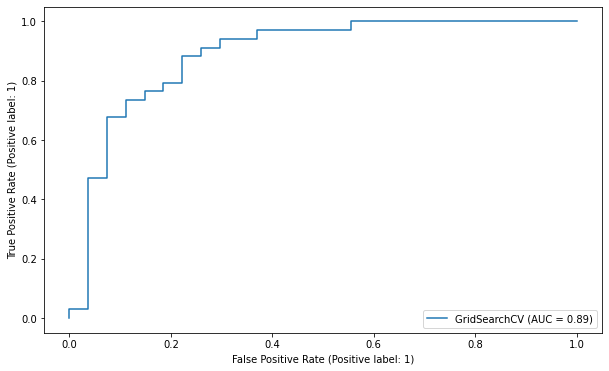

In [204]:
plot_roc_curve(grid_model, X_test_scaled, y_test)

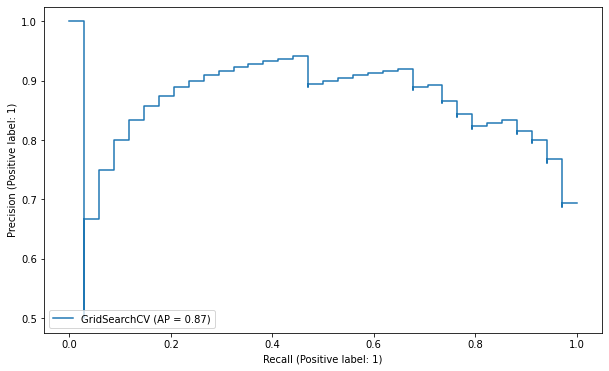

In [205]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

# Implement KNN and Evaluate

In [206]:
from sklearn.neighbors import KNeighborsClassifier

In [207]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [208]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [209]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
y_pred_proba

In [211]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.000,0.000
1,0.400,0.600
2,0.600,0.400
3,0.600,0.400
4,0.400,0.600
...,...,...
56,1.000,0.000
57,0.800,0.200
58,0.600,0.400
59,0.000,1.000


In [212]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [213]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
58,1,1,0.800,0.200
109,1,1,0.800,0.200
174,0,0,0.000,1.000
7,1,1,0.800,0.200
155,1,1,0.800,0.200
9,1,1,0.800,0.200
249,0,0,0.400,0.600
25,1,1,1.000,0.000
164,1,1,1.000,0.000
291,0,1,0.600,0.400


In [214]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [215]:
confusion_matrix(y_test, y_pred)


array([[21,  6],
       [ 9, 25]])

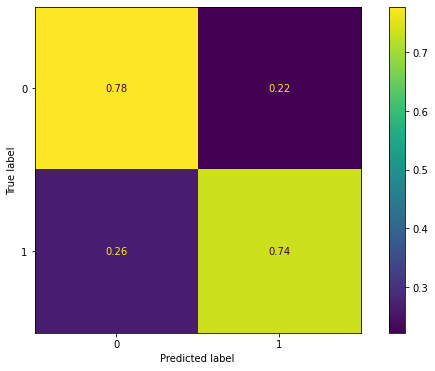

In [216]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test, normalize = "true");

In [217]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  6]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.81      0.74      0.77        34

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



In [218]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [219]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

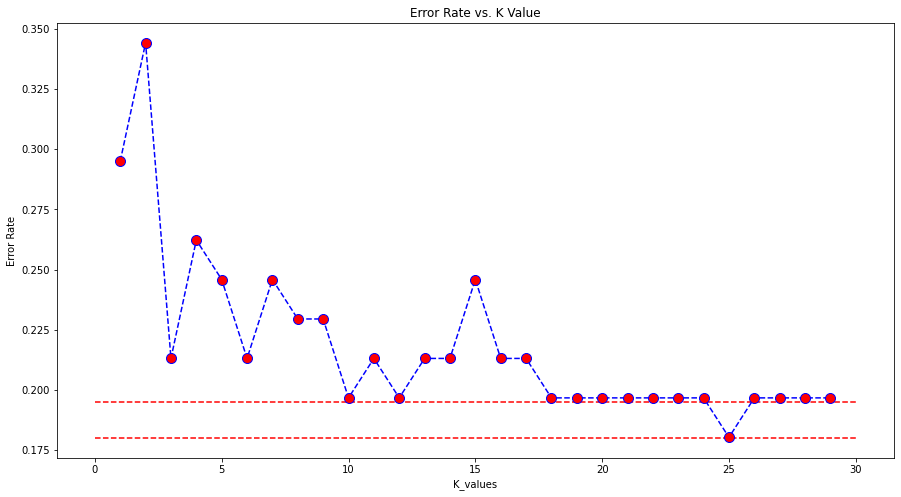

In [220]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.195, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.180, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

Yukarıdaki grafikten görüleceği gibi en düşük hata değerini veren k değeri 25. Ancak bu k değeri performans açısından oldukça yüksek bir değer ve k=10'a göre kayda değer bir fark olmadığı ilk etapta göze çarpıyor.

In [221]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [222]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_scaled,y_train)
print('WITH K=10\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=10

Test_Set

[[23  4]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.87      0.76      0.81        34

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set

[[ 94  16]
 [ 19 111]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.87      0.85      0.86       130

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



In [223]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train_scaled,y_train)
print('WITH K=25\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=25

Test_Set

[[23  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set

[[ 87  23]
 [ 14 116]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       110
           1       0.83      0.89      0.86       130

    accuracy                           0.85       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.85      0.85      0.85       240



As we can see number of total errors are 12 for k=10 and 11 for k=25. There is no significant difference.

In [ ]:
# Cross Validation

In [224]:
from sklearn.model_selection import cross_val_score, cross_validate

In [225]:
model = KNeighborsClassifier(n_neighbors=10)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003,0.008,0.917,0.867,1.000,0.929
2,0.001,0.005,0.792,0.833,0.769,0.800
3,0.001,0.005,0.917,1.000,0.846,0.917
4,0.001,0.005,0.833,0.846,0.846,0.846
5,0.001,0.005,0.792,0.750,0.923,0.828
6,0.001,0.005,0.792,0.786,0.846,0.815
7,0.001,0.005,0.917,0.923,0.923,0.923
8,0.001,0.005,0.833,0.909,0.769,0.833
9,0.001,0.005,0.792,0.833,0.769,0.800
10,0.001,0.005,0.750,0.818,0.692,0.750


In [226]:
df_scores.mean()[2:]

test_accuracy    0.833
test_precision   0.857
test_recall      0.838
test_f1          0.844
dtype: float64

In [227]:
df.sample(3)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
73,51,1,140,261,0,186,1,0.000,0,1,0,0,1,0,1,0,0,0,0
176,60,1,117,230,1,160,1,1.400,2,0,0,0,1,0,0,0,0,0,1
269,56,1,130,283,1,103,1,1.600,0,0,0,0,1,0,1,0,1,0,1


In [228]:
new_observation = [[40, 1, 130, 200, 1, 175, 0, 1.500, 0, 1,0,0,0,1,1,0,0,1]] 

In [229]:
knn_model.predict(new_observation) # without scaling prediction is 1. However, predictions without scaling is not reliable.

array([1])

In [230]:
knn_model.predict_proba(new_observation)

array([[0.44827586, 0.55172414]])

In [231]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[0.22916667, 1.        , 0.33962264, 0.16894977, 1.        ,
        0.79389313, 0.        , 0.24193548, 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        ]])

In [232]:
knn_model.predict(new_observation_scaled) # After scaling the prediction is changed. This prediction is more reliable.

array([0])

In [233]:
knn_model.predict_proba(new_observation_scaled)

array([[0.51724138, 0.48275862]])

In [ ]:
# GridSearchCV

In [251]:
from sklearn.model_selection import GridSearchCV

In [252]:
knn_grid = KNeighborsClassifier()

In [253]:
k_values= range(1,30)

In [254]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [255]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [256]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [257]:
knn_grid_model.best_params_

{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}

In [258]:
print('WITH K=8\n') # k = 8 is not a good value. Because as we can see there is an obvious overfitting problem. Model works perfectly in train set but does not work in test set.  
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=8

Test_Set

[[20  7]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        27
           1       0.79      0.79      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Train_Set

[[110   0]
 [  0 130]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       130

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [259]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [260]:
knn_model = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)

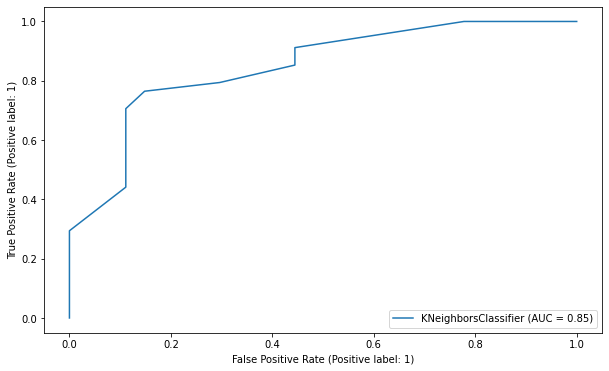

In [261]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [262]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8464052287581699

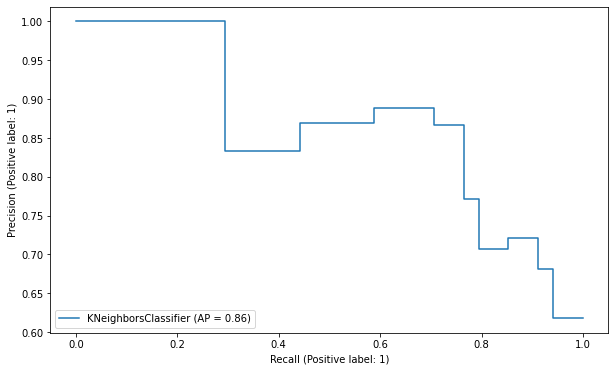

In [263]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

In [ ]:
# KNN model with k=10 has better cocnfusion matrix values which has total number of 12 errors. In which logistic regression model has 13 errors in total. Moreover there is an overfitting problem in logistic regression model in which accuracy in train set is %86 and %79 in test data.

# Chose best model and make a random prediction 

In [264]:
import pickle

In [265]:
scaler = MinMaxScaler()

In [266]:
scaler.fit(X)

MinMaxScaler()

In [267]:
X_scaled = scaler.transform(X)

In [269]:
final_model = KNeighborsClassifier(n_neighbors=10)

In [270]:
pickle.dump(final_model, open('final_model.pkl', 'wb'))

In [271]:
pickle.dump(scaler, open('scaler_final.pkl', 'wb'))

In [272]:
loaded_scaler = pickle.load(open('scaler_final.pkl', 'rb'))

In [273]:
loaded_model = pickle.load(open('final_model.pkl', 'rb'))

In [274]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_atypical angina', 'cp_non-anginal pain', 'cp_typical angina',
       'restecg_left ventricular hypertrophy', 'restecg_normal', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [276]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,301.000,54.379,9.111,29.000,47.000,56.000,61.000,77.000
sex,301.000,0.684,0.466,0.000,0.000,1.000,1.000,1.000
trestbps,301.000,131.648,17.594,94.000,120.000,130.000,140.000,200.000
chol,301.000,246.505,51.916,126.000,211.000,241.000,275.000,564.000
fbs,301.000,0.146,0.354,0.000,0.000,0.000,0.000,1.000
thalach,301.000,149.741,22.891,71.000,134.000,153.000,166.000,202.000
exang,301.000,0.326,0.469,0.000,0.000,0.000,1.000,1.000
oldpeak,301.000,1.043,1.163,0.000,0.000,0.800,1.600,6.200
ca,301.000,0.734,1.024,0.000,0.000,0.000,1.000,4.000
cp_atypical angina,301.000,0.166,0.373,0.000,0.000,0.000,0.000,1.000


In [277]:
df.sample(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
79,58,1,105,240,0,154,1,0.600,0,1,0,1,0,0,1,1,0,0,1
226,62,1,120,281,0,103,0,1.400,1,0,1,0,0,0,1,1,0,0,1
259,38,1,120,231,0,182,1,3.800,0,0,0,0,0,0,0,1,0,0,1
124,39,0,94,199,0,179,0,0.000,0,1,0,1,0,0,0,0,0,0,0
220,63,0,150,407,0,154,0,4.000,3,0,0,0,1,0,1,1,0,0,1


In [284]:
observation_new = [[40, 1, 140, 200, 1, 172, 0, 1.500, 2, 0,0,0,0,1,0,0,1,0], [20,1,120,150,1,80,1,0.000, 1, 1,0,0,0,0,1,0,0,0], [30,0,128,200,0,120,0,0.000,1,0,0,0,0,0,0,0,0,0], [43,1,140,300,0,100,0,0.800,2,0,0,1,1,0,0,1,0,0], [75,1, 150,350,0,110,0,1.100,2,0,1,0,0,0,0,0,0,1], [95, 0, 140, 300, 1, 130, 0, 0.500, 1, 0,0,0,0,1,1,0,1,0], [35, 0, 135, 200, 0, 125, 0, 0.100, 3, 0,0,1,0,1,0,0,1,0]] 

In [285]:
samples = pd.DataFrame(observation_new)
samples

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,40,1,140,200,1,172,0,1.500,2,0,0,0,0,1,0,0,1,0
1,20,1,120,150,1,80,1,0.000,1,1,0,0,0,0,1,0,0,0
2,30,0,128,200,0,120,0,0.000,1,0,0,0,0,0,0,0,0,0
3,43,1,140,300,0,100,0,0.800,2,0,0,1,1,0,0,1,0,0
4,75,1,150,350,0,110,0,1.100,2,0,1,0,0,0,0,0,0,1
5,95,0,140,300,1,130,0,0.500,1,0,0,0,0,1,1,0,1,0
6,35,0,135,200,0,125,0,0.100,3,0,0,1,0,1,0,0,1,0


In [286]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[ 0.22916667,  1.        ,  0.43396226,  0.16894977,  1.        ,
         0.77099237,  0.        ,  0.24193548,  0.5       ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [-0.1875    ,  1.        ,  0.24528302,  0.05479452,  1.        ,
         0.06870229,  1.        ,  0.        ,  0.25      ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.02083333,  0.        ,  0.32075472,  0.16894977,  0.        ,
         0.3740458 ,  0.        ,  0.        ,  0.25      ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.29166667,  1.        ,  0.43396226,  0.39726027,  0.        ,
         0.22137405,  0.        ,  0.12903226,  0.5       ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.   

In [287]:
loaded_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=10)

In [288]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [289]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,pred,pred_proba_1,pred_proba_0
0,40,1,140,200,1,172,0,1.500,2,0,0,0,0,1,0,0,1,0,1,0.800,0.200
1,20,1,120,150,1,80,1,0.000,1,1,0,0,0,0,1,0,0,0,1,0.900,0.100
2,30,0,128,200,0,120,0,0.000,1,0,0,0,0,0,0,0,0,0,1,1.000,0.000
3,43,1,140,300,0,100,0,0.800,2,0,0,1,1,0,0,1,0,0,0,0.400,0.600
4,75,1,150,350,0,110,0,1.100,2,0,1,0,0,0,0,0,0,1,1,0.600,0.400
5,95,0,140,300,1,130,0,0.500,1,0,0,0,0,1,1,0,1,0,1,0.700,0.300
6,35,0,135,200,0,125,0,0.100,3,0,0,1,0,1,0,0,1,0,0,0.500,0.500
